In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline


import yfinance as yf
import pandas as pd
import os

In [2]:
import hopsworks
import pandas as pd

In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/210071
Connected. Call `.close()` to terminate connection gracefully.


In [50]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


In [51]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [52]:
sp500.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0.0,0.0
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,0.0,0.0
2024-01-04 00:00:00-05:00,4697.419922,4726.779785,4687.529785,4688.680176,3715480000,0.0,0.0
2024-01-05 00:00:00-05:00,4690.569824,4721.490234,4682.109863,4697.240234,3844370000,0.0,0.0


In [54]:
sp500.loc[:"2024-01-04"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0.0,0.0
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0


In [55]:
# Taking dat aonly until 4th jan to test feature pipeline daily
sp500 = sp500.loc[:"2024-01-04"].copy()

In [56]:
sp500.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0.0,0.0
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,0.0,0.0
2024-01-04 00:00:00-05:00,4697.419922,4726.779785,4687.529785,4688.680176,3715480000,0.0,0.0


In [57]:
sp500.index = pd.to_datetime(sp500.index)

In [58]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0.0,0.0
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0


<Axes: xlabel='Date'>

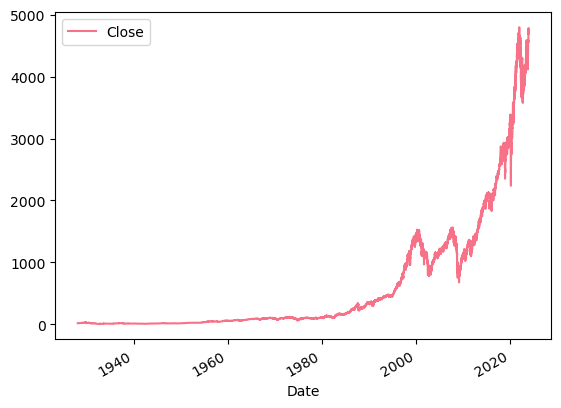

In [59]:
sp500.plot.line(y="Close", use_index=True)

In [60]:
sp500.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,24118.000000,24118.000000,24118.000000,24118.000000,2.411800e+04,24118.0,24118.0
mean,589.002563,612.541682,605.104005,609.057358,8.882371e+08,0.0,0.0
std,986.105323,980.453687,969.035742,975.100323,1.605180e+09,0.0,0.0
min,0.000000,4.400000,4.400000,4.400000,0.000000e+00,0.0,0.0
25%,9.620000,24.559999,24.559999,24.559999,1.490000e+06,0.0,0.0
50%,41.735001,102.540001,101.005001,101.820000,1.974000e+07,0.0,0.0
75%,993.612518,1002.704987,983.512512,994.005020,8.988000e+08,0.0,0.0
max,4804.509766,4818.620117,4780.979980,4796.560059,1.145623e+10,0.0,0.0


In [61]:
# Deleting unnecessary columns
del sp500["Dividends"]
del sp500["Stock Splits"]

In [24]:
# sp500['Date_Copy'] = sp500.index

In [62]:
# Considering data only after 1990
sp500 = sp500.loc["1990-01-01":].copy()

In [63]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000


In [64]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8568 entries, 1990-01-02 00:00:00-05:00 to 2024-01-04 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    8568 non-null   float64
 1   High    8568 non-null   float64
 2   Low     8568 non-null   float64
 3   Close   8568 non-null   float64
 4   Volume  8568 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 401.6 KB


            Open      High       Low     Close    Volume
Open    1.000000  0.999946  0.999921  0.999861  0.603269
High    0.999946  1.000000  0.999896  0.999927  0.604633
Low     0.999921  0.999896  1.000000  0.999935  0.601100
Close   0.999861  0.999927  0.999935  1.000000  0.602803
Volume  0.603269  0.604633  0.601100  0.602803  1.000000


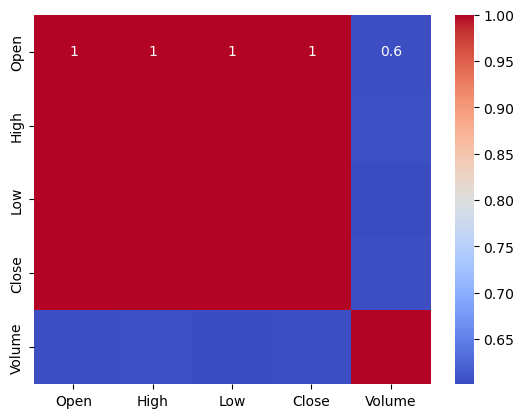

In [35]:
# Checking for correlation between all the columns
# Creating the correlation matrix of the dataset
temp_corr_matrix = sp500.corr()
print(temp_corr_matrix)

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(temp_corr_matrix, cmap='coolwarm', annot=True)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

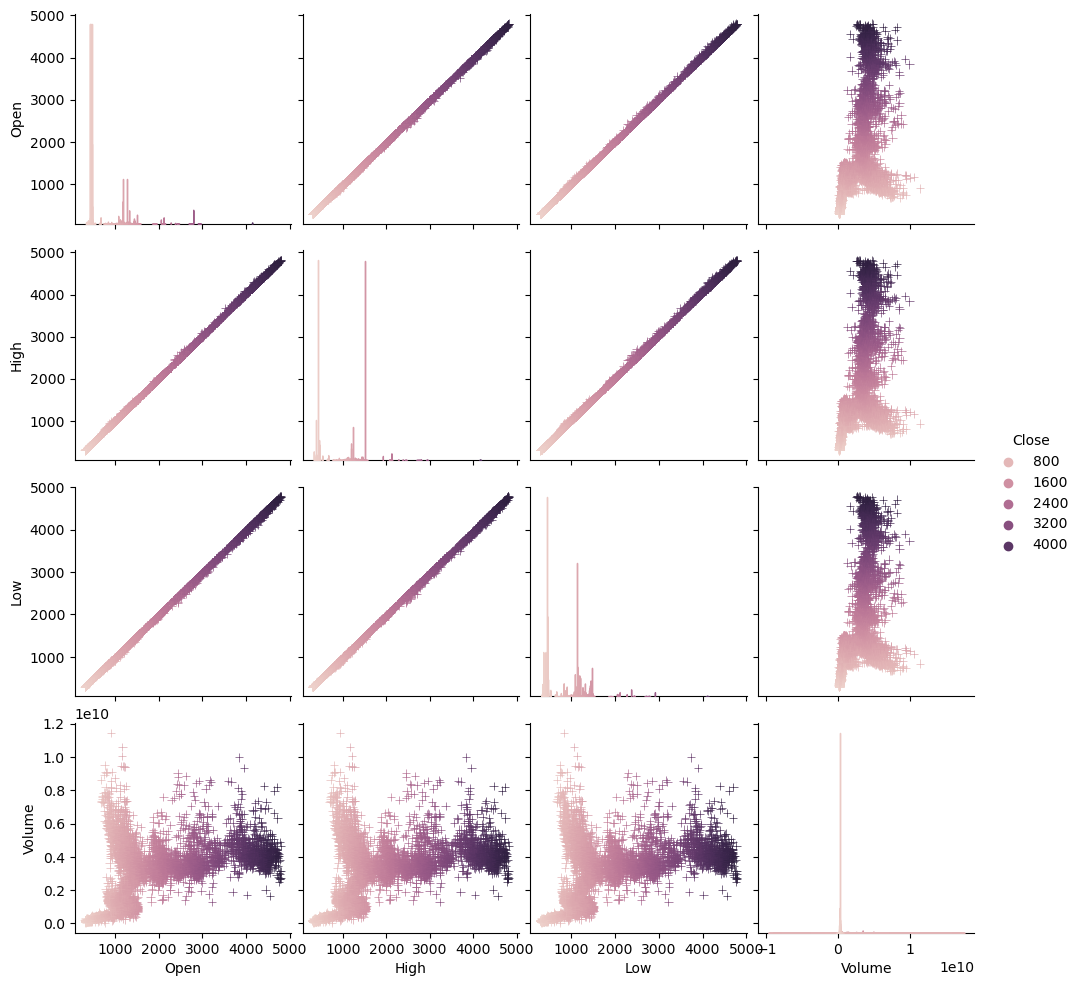

In [39]:
# Pairplot
g = sns.pairplot(sp500, hue='Close', markers='+')
plt.show()

#### Insert our Iris DataFrame into a FeatureGroup
Let's write our historical sp500 feature values and labels to a feature group. When you write historical data, this process is called backfilling.

In [65]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000


In [66]:
sp500_fg = fs.get_or_create_feature_group(
    name="sp500",
    version=1,
    primary_key=["Open","High","Low","Close","Volume"], 
    description="SP500 Dataset")
sp500_fg.insert(sp500)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/210071/fs/209990/fg/394607


Uploading Dataframe: 0.00% |          | Rows 0/8568 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: sp500_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/210071/jobs/named/sp500_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x29959dca050>, None)